In [ ]:
import sys
print(f"Python {sys.version}\n")

import numpy as np
print(f"Numpy {np.__version__}\n")

Python 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]

Numpy 1.21.6



In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

# Prepare Data

In [12]:
url1 = 'https://raw.githubusercontent.com/WatcharakorP/DADS5001_Midterm/main/2015.csv'


df_2015 = pd.read_csv(url1,sep=",")
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
#columns
df_2015.describe().T.iloc[:,0:0]

""
Happiness Rank
Happiness Score
Standard Error
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Dystopia Residual


In [ ]:
#Cleaning data
df_2015.info()
print(df_2015.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

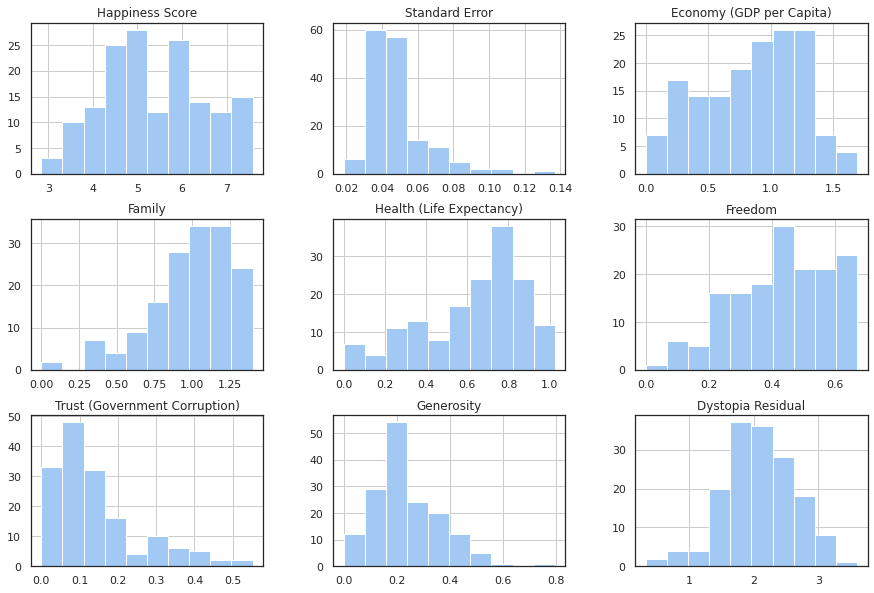

In [24]:
#Distribution
sns.set_theme(style="white",palette="pastel")
df_2015.iloc[:,3:].hist(figsize=(15,10));

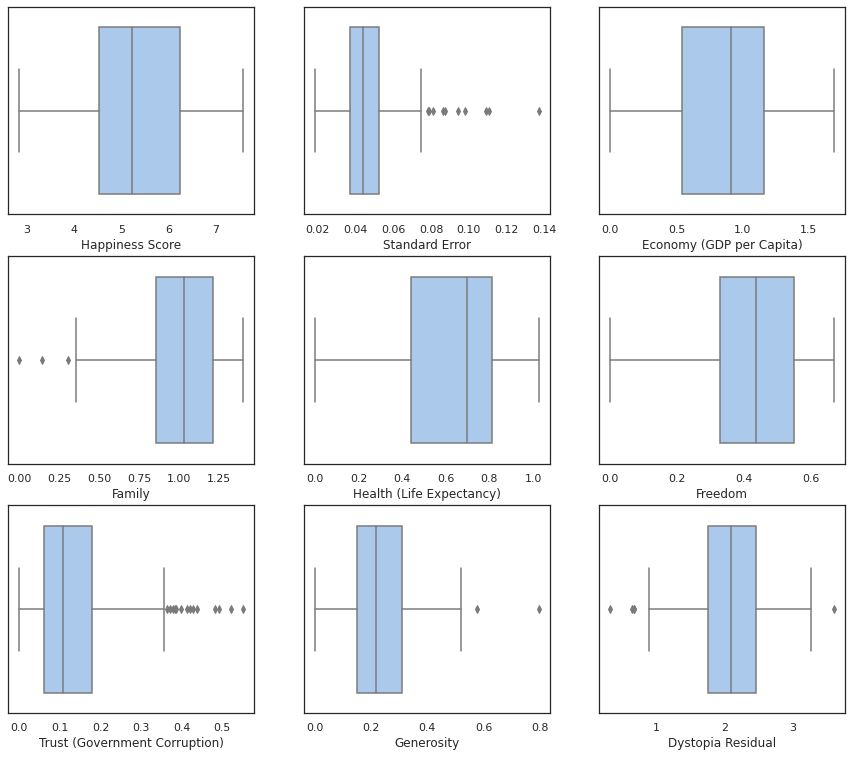

In [ ]:
#Distribution
plt.figure(figsize = (15,13))
for i,col in enumerate(df_2015.iloc[:,3:]):
  plt.subplot(3,3,i+1)
  sns.boxplot(x = col, data = df_2015)

plt.show()

In [ ]:
sorted_df = df_2015.pivot_table( index='Region', values='Country', aggfunc='count' ).sort_values(by=['Country'],ascending=False)
sorted_df.reset_index(inplace=True)
sorted_df

,Region,Country
0,Sub-Saharan Africa,40
1,Central and Eastern Europe,29
2,Latin America and Caribbean,22
3,Western Europe,21
4,Middle East and Northern Africa,20
5,Southeastern Asia,9
6,Southern Asia,7
7,Eastern Asia,6
8,Australia and New Zealand,2
9,North America,2


# Visualization Overall


Text(0, 0.5, 'Number of Country')

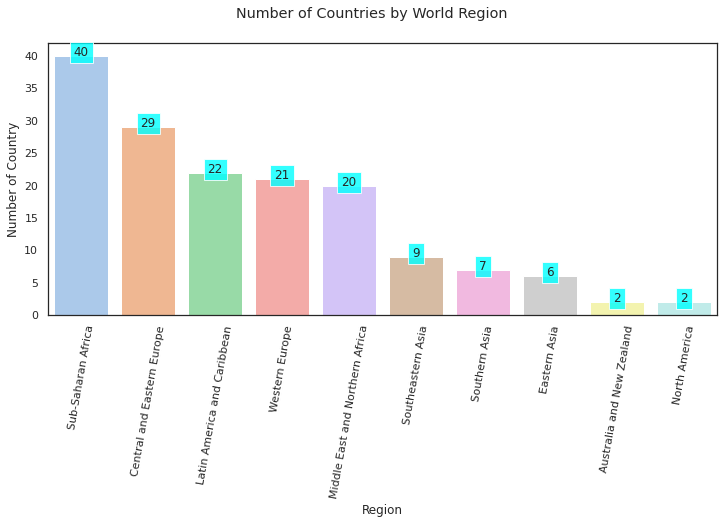

In [ ]:
#Number of Countries by World Region

plt.figure(figsize=(12,5))

sns.barplot(data=sorted_df, x=sorted_df['Region'],y=sorted_df['Country'])
plt.xticks(rotation=80)
for i in range(len(sorted_df['Region'])):
  plt.text(i,sorted_df['Country'][i],sorted_df['Country'][i], ha = 'center',bbox = dict(facecolor = 'cyan', alpha =0.8))
# Define labels & name
plt.suptitle("Number of Countries by World Region")
plt.ylabel("Number of Country")

In [33]:
#Average happiness Score by Region

df_rank2015 = df_2015.pivot_table( index='Region', values='Happiness Score', aggfunc='mean' ).sort_values(by=['Happiness Score'],ascending=False).round(2)
df_rank2015.reset_index(inplace=True)
df_rank2015

,Region,Happiness Score
0,Australia and New Zealand,7.28
1,North America,7.27
2,Western Europe,6.69
3,Latin America and Caribbean,6.14
4,Eastern Asia,5.63
5,Middle East and Northern Africa,5.41
6,Central and Eastern Europe,5.33
7,Southeastern Asia,5.32
8,Southern Asia,4.58
9,Sub-Saharan Africa,4.20


Text(0.5, 0.98, 'Average value of Happiness across Regions')

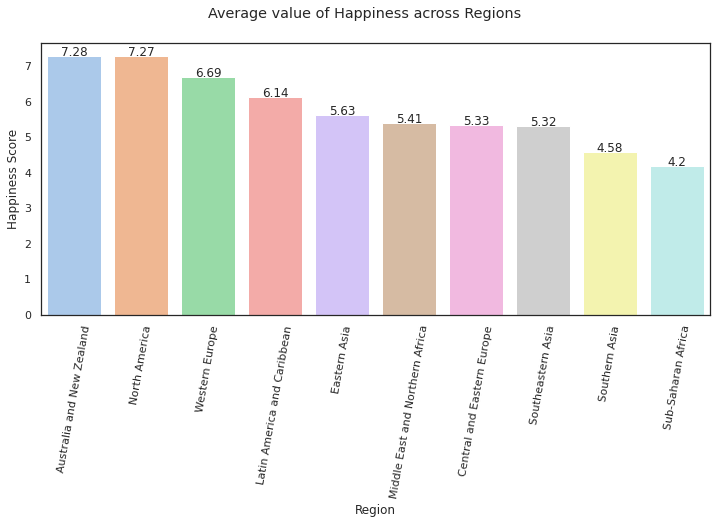

In [34]:
plt.figure(figsize=(12,5))

sns.barplot(data=df_rank2015, x=df_rank2015['Region'],y=df_rank2015['Happiness Score'])
plt.xticks(rotation=80)
for i in range(len(df_rank2015['Region'])):
  plt.text(i,df_rank2015['Happiness Score'][i],df_rank2015['Happiness Score'][i], ha = 'center')
plt.suptitle("Average value of Happiness across Regions")



**-Happiness score distribution in different regions.**


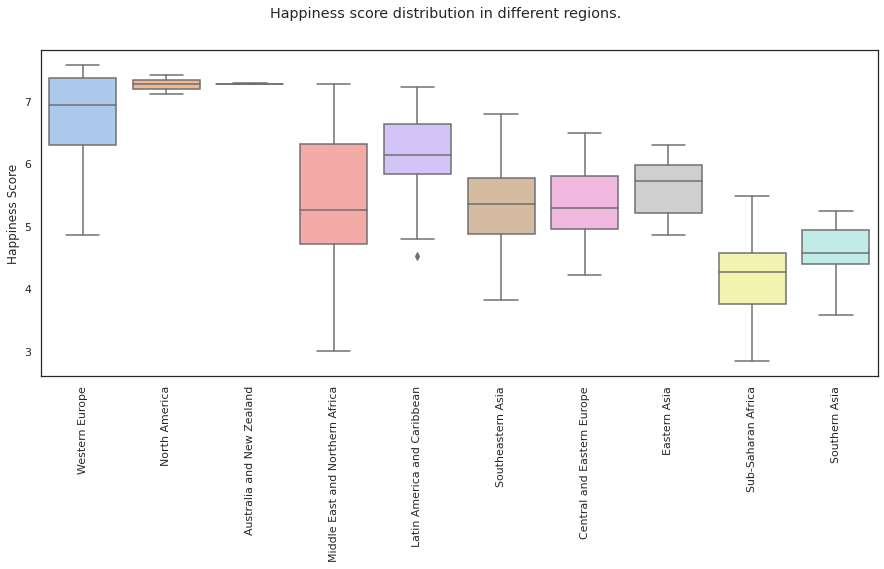

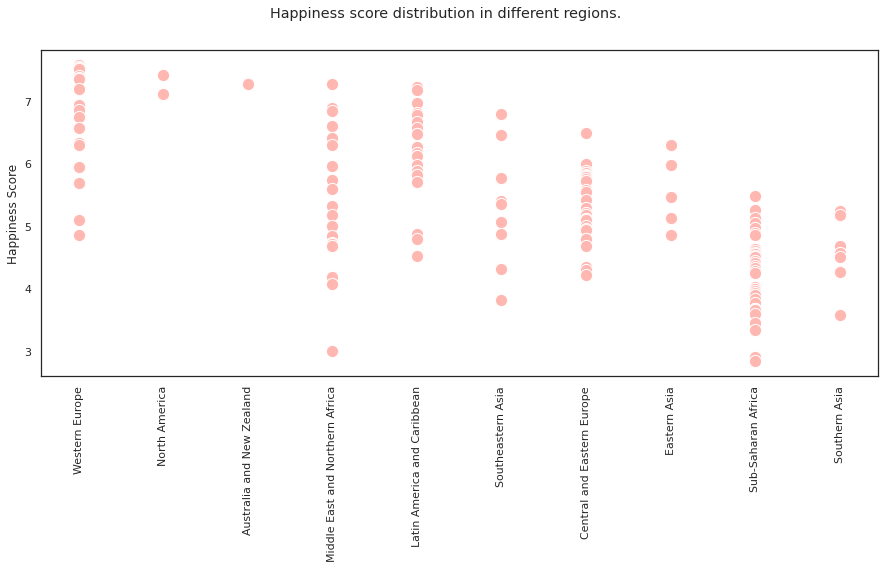

In [31]:
#Happiness score distribution in different regions.

df_region = df_2015[['Region','Happiness Score']].sort_values(by=['Happiness Score'],ascending=False).round(2)
df_region


#boxplot
plt.figure(figsize=(15,6))
sns.boxplot(data=df_region, x="Region", y="Happiness Score")
plt.xticks(rotation=90)
plt.suptitle("Happiness score distribution in different regions.")
plt.xlabel('')
plt.show()

#scatterplot
plt.figure(figsize=(15,6))
sns.scatterplot(data=df_region,x="Region", y="Happiness Score",color='#FFB7B2',s=150)
plt.xticks(rotation=90)
plt.suptitle("Happiness score distribution in different regions.")
plt.xlabel('')
plt.show()

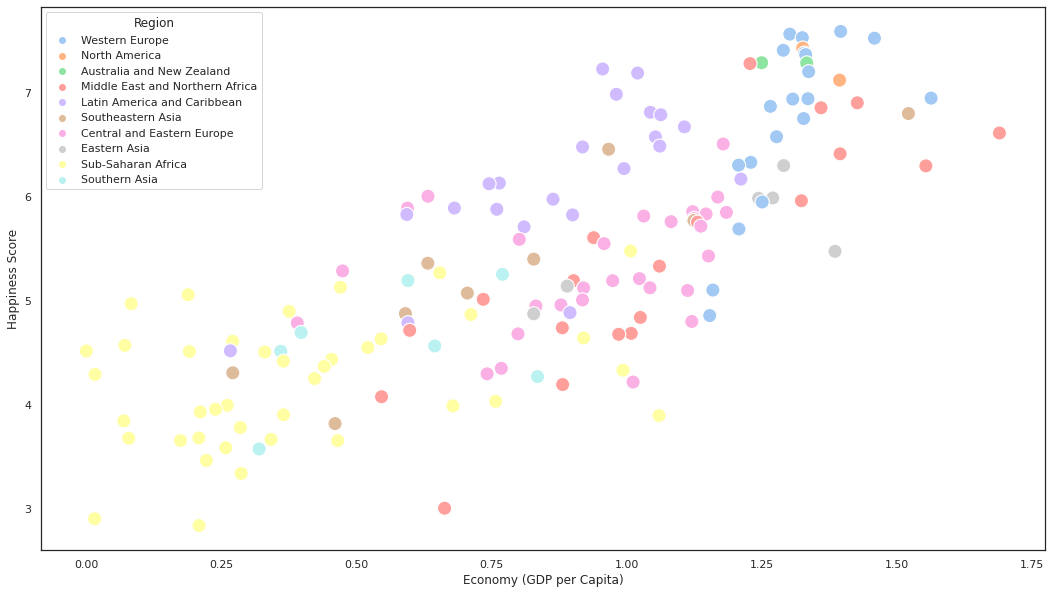

In [35]:
plt.figure(figsize=(18,10))
sns.scatterplot(data = df_2015, x = "Economy (GDP per Capita)", y = "Happiness Score", hue = "Region", s=200)
plt.show()

# Visualization_SoutheastAsia

**- Happiness Score**


In [37]:
df_southeast = df_2015[ df_2015['Region']=='Southeastern Asia'].round(2)
df_southeast.reset_index(inplace=True)
df_rank_sea = df_southeast[['Country','Region','Happiness Score']]
#df_rank_sea.reset_index(inplace=True)
df_rank_sea

,Country,Region,Happiness Score
0,Singapore,Southeastern Asia,6.80
1,Thailand,Southeastern Asia,6.46
2,Malaysia,Southeastern Asia,5.77
3,Indonesia,Southeastern Asia,5.40
4,Vietnam,Southeastern Asia,5.36
5,Philippines,Southeastern Asia,5.07
6,Laos,Southeastern Asia,4.88
7,Myanmar,Southeastern Asia,4.31
8,Cambodia,Southeastern Asia,3.82


Text(0.5, 0.98, 'Happiness Score by Country in Southeast Asia')

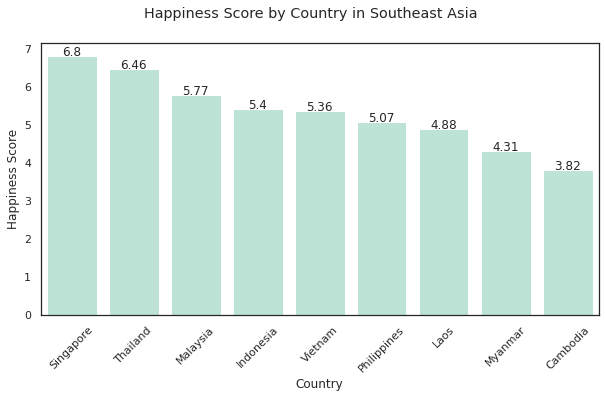

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_rank_sea, x=df_rank_sea['Country'],y=df_rank_sea['Happiness Score'],color='#B5EAD7' )
plt.xticks(rotation=45)
for i in range(len(df_rank_sea['Country'])):
  plt.text(i,df_rank_sea['Happiness Score'][i],df_rank_sea['Happiness Score'][i], ha = 'center')
#df_rank_southeast = df_2015.pivot_table( index='Region', values='Happiness Score', aggfunc='mean' ).sort_values(by=['Happiness Score'],ascending=False).round(2)
plt.suptitle("Happiness Score by Country in Southeast Asia")

**- Subplot the factor contributing to happiness**

Text(0.5, 0, '')

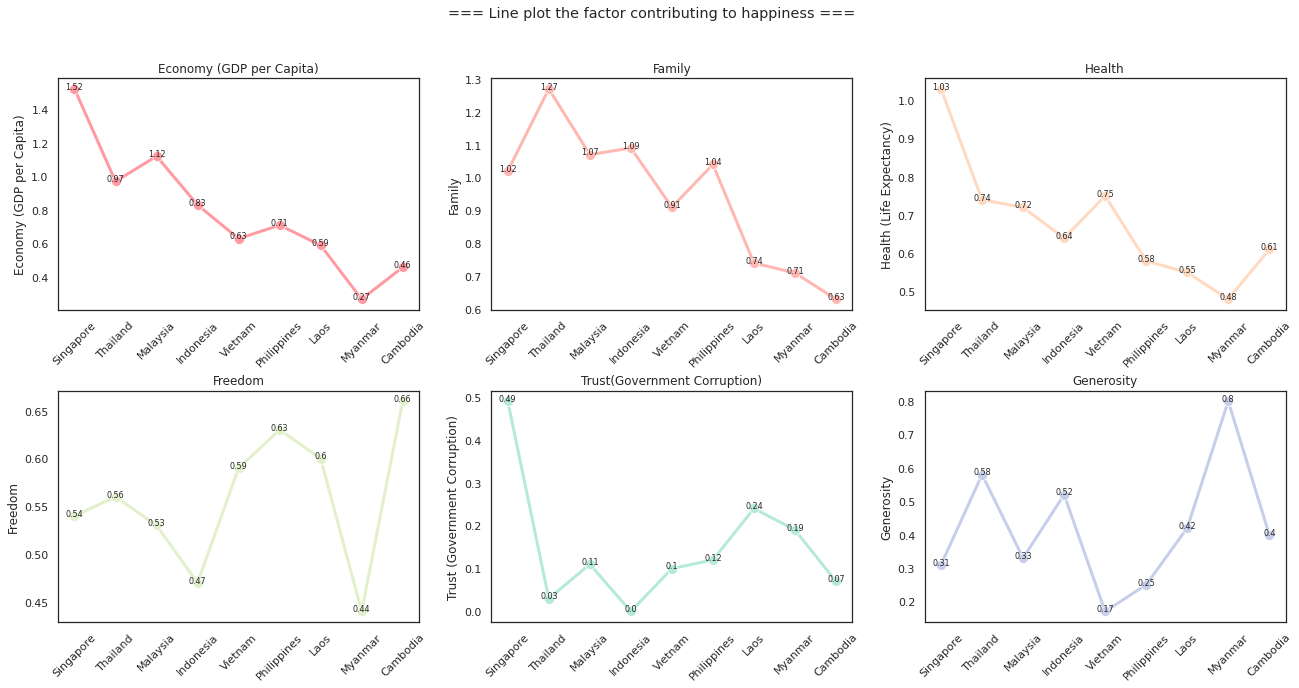

In [43]:
fig = plt.figure(figsize=(22,10))   
fig.suptitle('=== Line plot the factor contributing to happiness ===')
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.subplots_adjust(hspace=0.35)


plt.subplot(2,3,1)
sns.lineplot(data=df_southeast,x="Country",y='Economy (GDP per Capita)',marker='o',color='#FF9AA2',linewidth='3',markersize='10')
for i in range(len(df_southeast['Country'])):
  plt.text(i,df_southeast['Economy (GDP per Capita)'][i],df_southeast['Economy (GDP per Capita)'][i], ha='center',fontsize=8)  
plt.title('Economy (GDP per Capita)')
plt.xticks(rotation = 45)
plt.xlabel('')

plt.subplot(2,3,2)
sns.lineplot(data=df_southeast,x="Country",y='Family',marker='o',color='#FFB7B2',linewidth='3',markersize='10')
for i in range(len(df_southeast['Country'])):
  plt.text(i,df_southeast['Family'][i],df_southeast['Family'][i], ha = 'center',fontsize='8')  
plt.title('Family')
plt.xticks(rotation = 45)
plt.xlabel('')

plt.subplot(2,3,3)
sns.lineplot(data=df_southeast,x="Country",y='Health (Life Expectancy)',marker='o',color='#FFDAC1',linewidth='3',markersize='10')
for i in range(len(df_southeast['Country'])):
  plt.text(i,df_southeast['Health (Life Expectancy)'][i],df_southeast['Health (Life Expectancy)'][i], ha = 'center',fontsize='8')  
plt.title('Health')
plt.xticks(rotation = 45)
plt.xlabel('')

plt.subplot(2,3,4)
sns.lineplot(data=df_southeast,x="Country",y='Freedom',marker='o',color='#E2F0CB',linewidth='3',markersize='10')
for i in range(len(df_southeast['Country'])):
  plt.text(i,df_southeast['Freedom'][i],df_southeast['Freedom'][i], ha = 'center',fontsize='8')  
plt.title('Freedom')
plt.xticks(rotation = 45)
plt.xlabel('')

plt.subplot(2,3,5)
sns.lineplot(data=df_southeast,x="Country",y='Trust (Government Corruption)',marker='o',color='#B5EAD7',linewidth='3',markersize='10')
plt.title('Trust(Government Corruption)')
for i in range(len(df_southeast['Country'])):
  plt.text(i,df_southeast['Trust (Government Corruption)'][i],df_southeast['Trust (Government Corruption)'][i], ha = 'center',fontsize='8')  
plt.xticks(rotation = 45)
plt.xlabel('')

plt.subplot(2,3,6)
sns.lineplot(data=df_southeast,x="Country",y='Generosity',marker='o',color='#C7CEEA',linewidth='3',markersize='10')
for i in range(len(df_southeast['Country'])):
  plt.text(i,df_southeast['Generosity'][i],df_southeast['Generosity'][i], ha = 'center',fontsize='8')  
plt.title('Generosity')
plt.xticks(rotation = 45)
plt.xlabel('')

# Visualization_Top10_Country

**- Top10 Happiness Rank in the world**

In [61]:
df_top10 = df_2015.iloc[:10]
df_thailand = df_2015[ df_2015['Country']=='Thailand']
df_analyze_top10 = pd.concat([df_top10,df_thailand]).round(2)
df_analyze_top10.reset_index(inplace=True)
df_analyze_top10
df_analyze_top10[['Country','Happiness Rank','Happiness Score']]

,Country,Happiness Rank,Happiness Score
0,Switzerland,1,7.59
1,Iceland,2,7.56
2,Denmark,3,7.53
3,Norway,4,7.52
4,Canada,5,7.43
5,Finland,6,7.41
6,Netherlands,7,7.38
7,Sweden,8,7.36
8,New Zealand,9,7.29
9,Australia,10,7.28


Text(0.5, 0.98, 'Top10 Happiness Rank in the world')

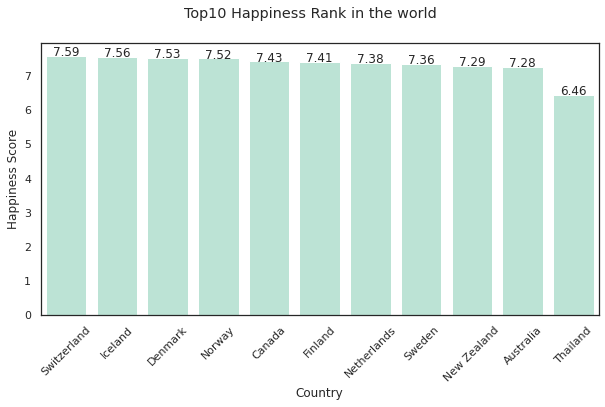

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_analyze_top10, x=df_analyze_top10['Country'],y=df_analyze_top10['Happiness Score'],color='#B5EAD7' )
plt.xticks(rotation=45)
for i in range(len(df_analyze_top10['Country'])):
  plt.text(i,df_analyze_top10['Happiness Score'][i],df_analyze_top10['Happiness Score'][i], ha = 'center')


plt.suptitle("Top10 Happiness Rank in the world")

**- Overview Score each facter make a happiness**

In [78]:
df = df_analyze_top10.loc[:,['Country','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]
df = df.set_index('Country')
df_transform = df.T
df_transform.reset_index(inplace=True)
df_transform

Country,index,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,Australia,Thailand
0,Economy (GDP per Capita),1.40,1.30,1.33,1.46,1.33,1.29,1.33,1.33,1.25,1.33,0.97
1,Family,1.35,1.40,1.36,1.33,1.32,1.32,1.28,1.29,1.32,1.31,1.27
2,Health (Life Expectancy),0.94,0.95,0.87,0.89,0.91,0.89,0.89,0.91,0.91,0.93,0.74
3,Freedom,0.67,0.63,0.65,0.67,0.63,0.64,0.62,0.66,0.64,0.65,0.56
4,Trust (Government Corruption),0.42,0.14,0.48,0.37,0.33,0.41,0.32,0.44,0.43,0.36,0.03
5,Generosity,0.30,0.44,0.34,0.35,0.46,0.23,0.48,0.36,0.48,0.44,0.58


Text(0.5, 1.0, 'The six factors of top 10 countries compare with thailand')

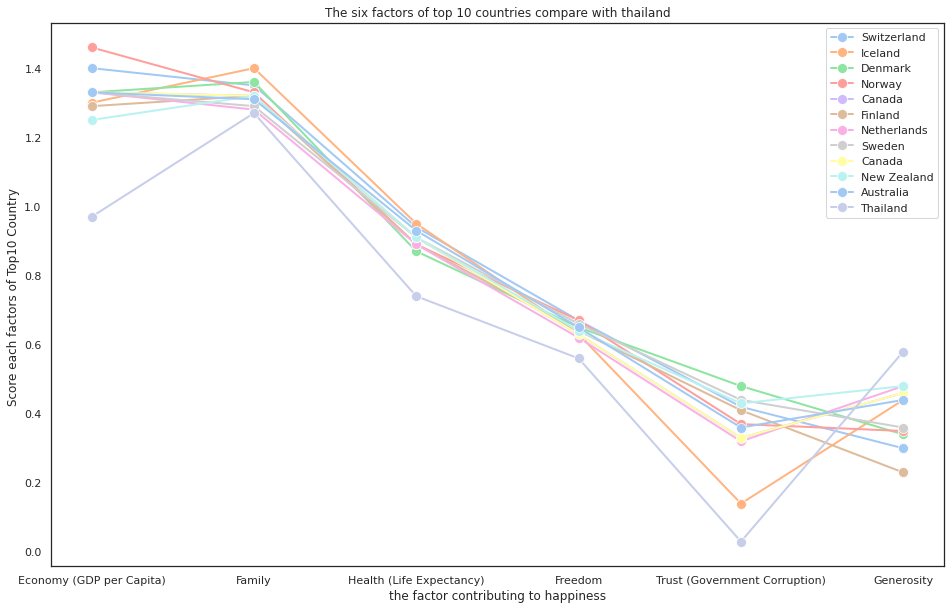

In [79]:
plt.figure(figsize=(16,10))
sns.lineplot(data=df_transform,x="index",y='Switzerland',marker='o',label='Switzerland',linewidth='2',markersize='10')
sns.lineplot(data=df_transform,x="index",y='Iceland',marker='o',label='Iceland',linewidth='2',markersize='10')
sns.lineplot(data=df_transform,x="index",y='Denmark',marker='o',label='Denmark',linewidth='2',markersize='10')
sns.lineplot(data=df_transform,x="index",y='Norway',marker='o',label='Norway',linewidth='2',markersize='10')
sns.lineplot(data=df_transform,x="index",y='Canada',marker='o',label='Canada',linewidth='2',markersize='10')
sns.lineplot(data=df_transform,x="index",y='Finland',marker='o',label='Finland',linewidth='2',markersize='10')
sns.lineplot(data=df_transform,x="index",y='Netherlands',marker='o',label='Netherlands',linewidth='2',markersize='10')
sns.lineplot(data=df_transform,x="index",y='Sweden',marker='o',label='Sweden',linewidth='2',markersize='10')
sns.lineplot(data=df_transform,x="index",y='Canada',marker='o',label='Canada',linewidth='2',markersize='10')
sns.lineplot(data=df_transform,x="index",y='New Zealand',marker='o',label='New Zealand',linewidth='2',markersize='10')
sns.lineplot(data=df_transform,x="index",y='Australia',marker='o',label='Australia',linewidth='2',markersize='10')
sns.lineplot(data=df_transform,x="index",y='Thailand',marker='o',label='Thailand',linewidth='2',markersize='10',color='#C7CEEA')
plt.ylabel("Score each factors of Top10 Country ")
plt.xlabel("the factor contributing to happiness")
plt.title('The six factors of top 10 countries compare with thailand')

**- The six factors of top 10 countries compare with thailand'**

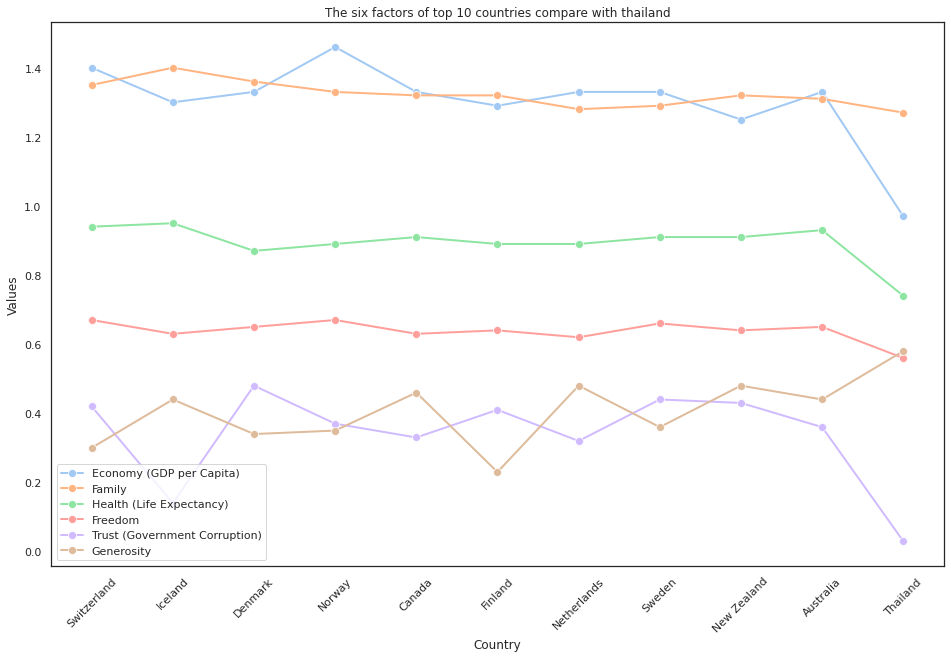

In [ ]:
plt.figure(figsize=(16,10))
#sns.lineplot(data=df_analyze_top10,x="Country",y='Happiness Score',marker='o',label='Happiness Score')
sns.lineplot(data=df_analyze_top10,x="Country",y='Economy (GDP per Capita)',marker='o',label='Economy (GDP per Capita)',linewidth='2',markersize='8')
sns.lineplot(data=df_analyze_top10,x="Country",y='Family',marker='o',label='Family',linewidth='2',markersize='8')
sns.lineplot(data=df_analyze_top10,x="Country",y='Health (Life Expectancy)',marker='o',label='Health (Life Expectancy)',linewidth='2',markersize='8')
sns.lineplot(data=df_analyze_top10,x="Country",y='Freedom',marker='o',label='Freedom',linewidth='2',markersize='8')
sns.lineplot(data=df_analyze_top10,x="Country",y='Trust (Government Corruption)',marker='o',label='Trust (Government Corruption)',linewidth='2',markersize='8')
sns.lineplot(data=df_analyze_top10,x="Country",y='Generosity',marker='o',label='Generosity',linewidth='2',markersize='8')
#sns.lineplot(data=df_analyze_top10,x="Country",y='Dystopia Residual',marker='o',label='Dystopia Residual')

plt.xticks(rotation = 45)
plt.ylabel('Values')
plt.title('The six factors of top 10 countries compare with thailand')
plt.legend()
plt.show()

# Visualization_Thailand_Multiple_File



In [81]:
url1 = 'https://raw.githubusercontent.com/WatcharakorP/DADS5001_Midterm/main/2015.csv'
url2 = 'https://raw.githubusercontent.com/WatcharakorP/DADS5001_Midterm/main/2016.csv'
url3 = 'https://raw.githubusercontent.com/WatcharakorP/DADS5001_Midterm/main/2017.csv'
url4 = 'https://raw.githubusercontent.com/WatcharakorP/DADS5001_Midterm/main/2018.csv'
url5 = 'https://raw.githubusercontent.com/WatcharakorP/DADS5001_Midterm/main/2019.csv'

df_2015 = pd.read_csv(url1,sep=",")
df_2016 = pd.read_csv(url2,sep=",")
df_2017 = pd.read_csv(url3,sep=",")
df_2018 = pd.read_csv(url4,sep=",")
df_2019 = pd.read_csv(url5,sep=",")
#df_2015.info(),df_2016.info(),df_2017.info(),df_2018.info(),df_2019.info()

In [82]:
#2015
df_2015.set_index('Country',inplace=True)
df_thailand15 = df_2015.loc[['Thailand']]

#2016
df_2016.set_index('Country',inplace=True)
df_thailand16 = df_2016.loc[['Thailand']]

#2017
df_2017.set_index('Country',inplace=True)
df_thailand17 = df_2017.loc[['Thailand']]

#2018
df_2018.set_index('Country or region',inplace=True)
df_thailand18 = df_2018.loc[['Thailand']]

#2019
df_2019.set_index('Country or region',inplace=True)
df_thailand19 = df_2019.loc[['Thailand']]

<function matplotlib.pyplot.show(*args, **kw)>

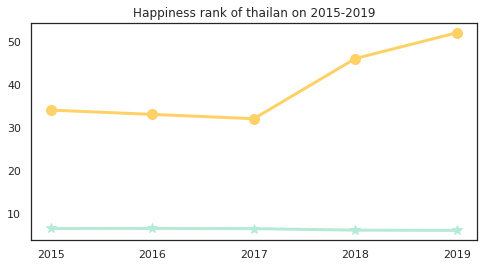

In [118]:
rank_15th = df_thailand15['Happiness Rank']
rank_16th = df_thailand16['Happiness Rank']
rank_17th = df_thailand17['Happiness.Rank']
rank_18th = df_thailand18['Overall rank']
rank_19th = df_thailand19['Overall rank']
score_15th = df_thailand15['Happiness Score']
score_16th = df_thailand16['Happiness Score']
score_17th = df_thailand17['Happiness.Score']
score_18th = df_thailand18['Score']
score_19th = df_thailand19['Score']


x = [2015,2016,2017,2018,2019]
y = [rank_15th,rank_16th,rank_17th,rank_18th,rank_19th]
z = [score_15th,score_16th,score_17th,score_18th,score_19th]
fig,axes=plt.subplots(1,1,figsize=(8,4))
axes.plot(x, y,marker='o',color='#ffd166',linewidth='3',markersize=10)
axes.plot(x, z,marker='*',color='#B5EAD7',linewidth='3',markersize=10)
axes.xaxis.set_ticks([2015,2016,2017,2018,2019])  
plt.title('Happiness rank of thailan on 2015-2019')
plt.show